In [103]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy import sqrt
import pandas as pd
import scipy.constants as const
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties import unumpy as unp 
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray

/tmp/ipykernel_13858/1522669982.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  md_rearranged = np.c_[x[:np.int(np.round(len(x)/2))], counts[:np.int(np.round(len(x)/2))], x[np.int(np.round(len(x)/2)):], counts[np.int(np.round(len(x)/2)):]]


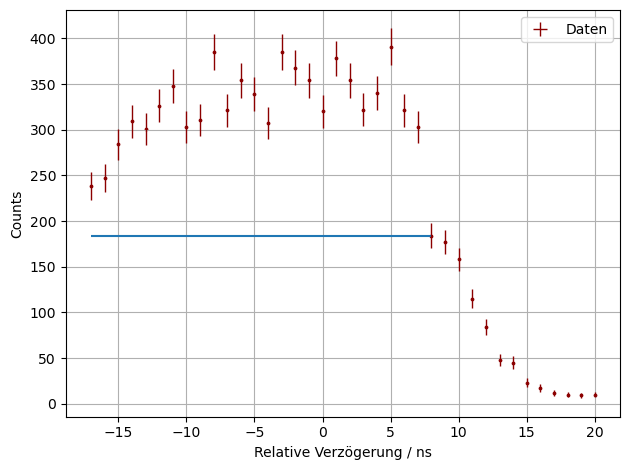

Halbwerstbreite: 25ns


In [104]:
# Tabelle 1:

md = pd.read_csv('tables/20ns_table.csv')
md = md.to_numpy()
x = md[:,0]
counts = md[:,1]
md_rearranged = np.c_[x[:np.int(np.round(len(x)/2))], counts[:np.int(np.round(len(x)/2))], x[np.int(np.round(len(x)/2)):], counts[np.int(np.round(len(x)/2)):]]
# md_rearranged = md.reshape((-1,4))

plt.hlines(md[25,1], md[0,0], md[25,0])
plt.errorbar(x=x, y=counts,xerr=0, yerr=np.sqrt(counts), label="Daten", color='darkred',elinewidth=1, fmt=' ')
plt.scatter(x=x, y=counts, color='darkred', s=3)
plt.ylabel('Counts')
plt.xlabel('Relative Verzögerung / ns')
plt.tight_layout()
plt.grid(':')
plt.legend(loc="best")
plt.show()
None
print('Halbwerstbreite: ' + str(md[25,0] - md[0,0]) + 'ns')

U_theo

In [134]:
from uncertainties.umath import exp as uncer_exp
N_start = 595280 + 9999999
N_start = ufloat(N_start, np.sqrt(N_start))
N_ver = 21135
T_mess = 406080 # In Sekunden (4.7 Tage)
T_such = 10**(-5) # In Sekunden (10 Mikrosekunden)
bins = 512

n = N_start / T_mess 
print(f'{n=:}')

P_1 = (T_such  * n) * uncer_exp(T_such * n)
print(f'{P_1 * 10**3=:}')
N_Fehl = N_start * P_1
U = N_Fehl / bins
print(f'{U=:}')

n=26.092+/-0.008
P_1 * 10**3=0.26098+/-0.00008
U=5.4008+/-0.0033


Gesuchte Verzögerung

In [106]:
np.sum(counts * np.abs(x)) / np.sum(counts)

7.212723876497088

/tmp/ipykernel_13858/2068825783.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  md_rearranged = np.c_[x[:np.int(np.round(len(x)/2))], counts[:np.int(np.round(len(x)/2))], x[np.int(np.round(len(x)/2)):], counts[np.int(np.round(len(x)/2)):]]


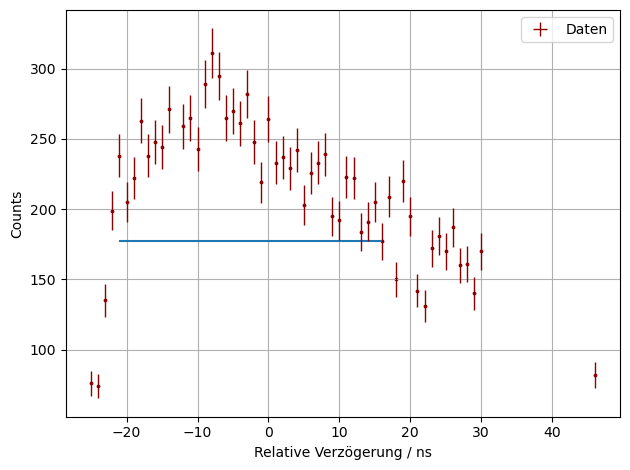

Halbwerstbreite: 37ns


In [107]:
# Tabelle 1:

md = pd.read_csv('tables/30ns_table.csv')
md = md.to_numpy()
x = md[:,0]
counts = md[:,1]
md_rearranged = np.c_[x[:np.int(np.round(len(x)/2))], counts[:np.int(np.round(len(x)/2))], x[np.int(np.round(len(x)/2)):], counts[np.int(np.round(len(x)/2)):]]
# md_rearranged = md.reshape((-1,4))

plt.hlines(md[40,1], md[4,0], md[40,0])
# plt.plot(x, counts, 'r+', label="Daten", marker='x')
plt.errorbar(x=x, y=counts,xerr=0, yerr=np.sqrt(counts), label="Daten", color='darkred',elinewidth=1, fmt=' ')
plt.scatter(x=x, y=counts, color='darkred', s=3)
plt.ylabel('Counts')
plt.xlabel('Relative Verzögerung / ns')
plt.tight_layout()
plt.grid(':')
plt.legend(loc="best")
plt.show()
None
print('Halbwerstbreite: ' + str(md[40,0] - md[4,0]) + 'ns')

Parameter:  [0.02257131 0.14801307] 
Fehler:  [4.50070690e-05 5.99359768e-03]


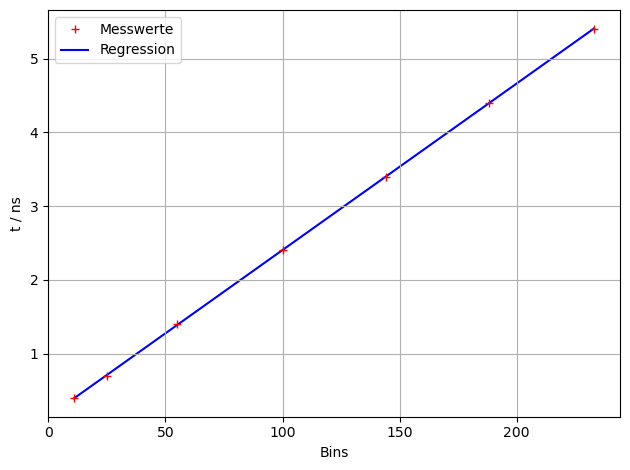

In [108]:
def func(x, m, b):
    return m * x + b

md = pd.read_csv('tables/monoflop.csv')
md = md.to_numpy()

y = md[:,0]
bins = md[:,1]

params, cov = curve_fit(func, bins, y)
print('Parameter: ', params, '\nFehler: ', np.sqrt(np.diag(cov)))

m = ufloat(params[0], np.sqrt(np.diag(cov))[0])
b = ufloat(params[1], np.sqrt(np.diag(cov))[1])

plt.plot(bins, y, 'r+', label="Messwerte",)
plt.plot(bins, func(bins, *params), 'b', label="Regression", zorder=0)
plt.ylabel('t / ns')
plt.xlabel('Bins')
plt.tight_layout()
plt.grid(':')
plt.legend(loc="best")
# plt.show()
# print(m)
# print(b)

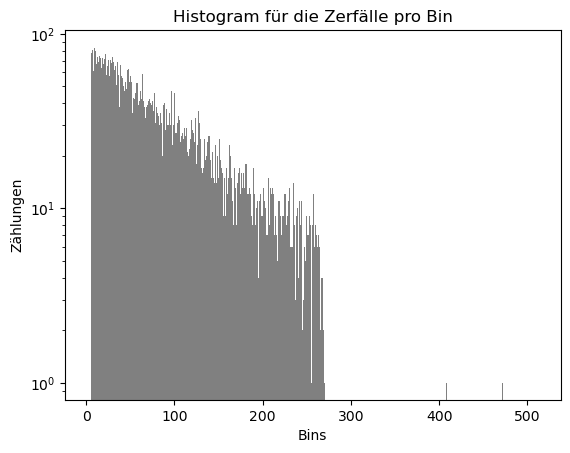

In [109]:
counts=np.genfromtxt('tables/myon.txt', unpack=True)

# Specify the bin edges
bins = np.linspace(1, 512, 512)

# Specify the bin heights
bin_heights = counts

# Create the histogram using the specified bins and heights
plt.hist(bins, bins=bins, weights=bin_heights, log=True, color='grey')

# Set labels and title
plt.xlabel('Bins')
plt.ylabel('Zählungen')
plt.title('Histogram für die Zerfälle pro Bin')

# Show the plot
plt.show()


2.82+/-0.13
Parameter:  [ 7.93232888e+01  3.55008269e+05 -3.70191008e+00] 
Fehler:  [1.55335125e+00 1.64916559e+04 8.28314658e-01]


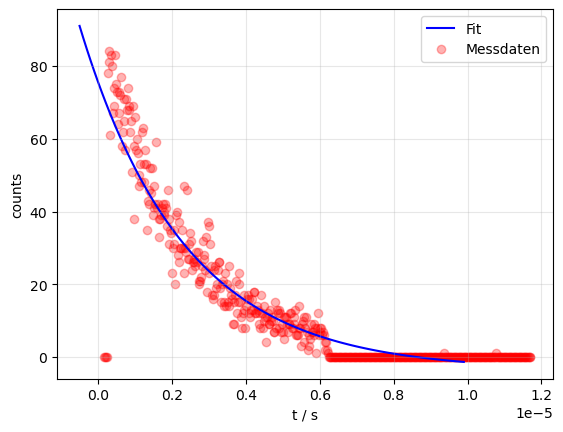

In [110]:
def func2(t, N_0, lam, U):
    return N_0 * np.exp(- lam * t)+ U

def func3(bin):                 # Converts bins to time
    return (m.nominal_value * bin + b.nominal_value) * 10**(-6)

params, cov = curve_fit(func2, func3(bins), counts)
N_0 = ufloat(params[0], np.sqrt(np.diag(cov))[0])
lam = ufloat(params[1], np.sqrt(np.diag(cov))[1])
U = ufloat(params[2], np.sqrt(np.diag(cov))[2])

print((1 / lam ) * 10**6)

print('Parameter: ', params, '\nFehler: ', np.sqrt(np.diag(cov)))

x = np.arange(-0.5 *  10**(-6),10 * 10**(-6),0.1* 10**(-6))
plt.plot(x, func2(x, *params), ls='-', c='b', zorder=1, label='Fit')
plt.plot(func3(bins),counts, 'o', alpha=0.3, c='r', zorder=0, label='Messdaten')
# plt.yscale('log')
plt.xlabel('t / s')
plt.ylabel('counts')
plt.grid('::', alpha=0.3)
plt.legend()
plt.show()

tau 2.09+/-0.04
N_0 =  92.5+/-1.0
lam =  (4.78+/-0.10)e+05
U =  0.00+/-0.31


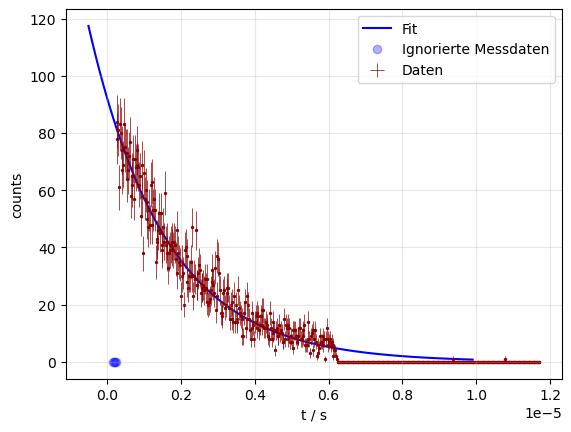

In [122]:
def func4(t, N_0, lam, U):
    return N_0 * np.exp(- lam * t)+ U

bounds = ([0, 0, 0], [np.inf, np.inf, np.inf])

t = func3(bins)#- func(4, m, b).nominal_value * 10**-6
params, cov = curve_fit(func4, t[4:], counts[4:], bounds=bounds)
N_0 = ufloat(params[0], np.sqrt(np.diag(cov))[0])
lam = ufloat(params[1], np.sqrt(np.diag(cov))[1])
U = ufloat(params[2], np.sqrt(np.diag(cov))[2])
 
print('tau', (1 / lam ) * 10**6)
print('N_0 = ', N_0)
print('lam = ', lam)
print('U = ', U)


x = np.arange(-0.5 *  10**(-6),10 * 10**(-6),0.1* 10**(-6))
plt.plot(x, func4(x, *params), ls='-', c='b', zorder=1, label='Fit')
# plt.plot(t[4:],counts[4:], 'o', alpha=0.3, c='r', zorder=0, label='Messdaten')
plt.errorbar(x=t[4:], y=counts[4:],xerr=0, yerr=np.sqrt(counts[4:]), label="Daten", color='darkred',elinewidth=0.5, fmt=' ')
plt.scatter(x=t[4:], y=counts[4:], color='darkred', s=2)
plt.plot(t[:4],counts[:4], 'o', alpha=0.3, c='b', zorder=0, label='Ignorierte Messdaten')
plt.xlabel('t / s')
plt.ylabel('counts')
plt.grid('::', alpha=0.3)
plt.legend()
plt.show()

In [112]:
data1 = np.c_[bins[:40], counts[:40], bins[40:80], counts[40:80], bins[80:120], counts[80:120], bins[120:160],counts[120:160]]

data2 = np.c_[bins[160:200], counts[160:200], bins[200:240], counts[200:240], bins[240:280], counts[240:280], bins[280:320],counts[280:320]]

data3 = np.c_[bins[360:398], counts[360:398], bins[398:436], counts[398:436], bins[436:474], counts[436:474], bins[474:513], counts[474:512]]

df = pd.DataFrame(data1)
hea = list(['Bin', 'Counts','Bin', 'Counts','Bin', 'Counts','Bin', 'Counts'])
df_table = df.to_latex(index = False, column_format= "c c c c c c c c", decimal=',', header=hea, label='tab:messdaten_myonen', caption='Messdaten der Lebenszeitmessung der Myonen.')
# with open('build/messdaten_myonen.txt', 'w') as f:
#     f.write(df_table)
print(df_table)

\begin{table}
\centering
\caption{Messdaten der Lebenszeitmessung der Myonen.}
\label{tab:messdaten_myonen}
\begin{tabular}{c c c c c c c c}
\toprule
 Bin & Counts &  Bin & Counts &   Bin & Counts &   Bin & Counts \\
\midrule
 1,0 &    0,0 & 41,0 &   56,0 &  81,0 &   34,0 & 121,0 &   27,0 \\
 2,0 &    0,0 & 42,0 &   50,0 &  82,0 &   23,0 & 122,0 &   24,0 \\
 3,0 &    0,0 & 43,0 &   47,0 &  83,0 &   30,0 & 123,0 &   33,0 \\
 4,0 &    0,0 & 44,0 &   53,0 &  84,0 &   35,0 & 124,0 &   18,0 \\
 5,0 &   78,0 & 45,0 &   48,0 &  85,0 &   31,0 & 125,0 &   37,0 \\
 6,0 &   84,0 & 46,0 &   62,0 &  86,0 &   20,0 & 126,0 &   23,0 \\
 7,0 &   81,0 & 47,0 &   63,0 &  87,0 &   39,0 & 127,0 &   36,0 \\
 8,0 &   61,0 & 48,0 &   48,0 &  88,0 &   40,0 & 128,0 &   31,0 \\
 9,0 &   83,0 & 49,0 &   53,0 &  89,0 &   28,0 & 129,0 &   25,0 \\
10,0 &   80,0 & 50,0 &   57,0 &  90,0 &   37,0 & 130,0 &   17,0 \\
11,0 &   67,0 & 51,0 &   53,0 &  91,0 &   26,0 & 131,0 &   16,0 \\
12,0 &   74,0 & 52,0 &   35,0 &  92,0

/tmp/ipykernel_13858/2813399623.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_table = df.to_latex(index = False, column_format= "c c c c c c c c", decimal=',', header=hea, label='tab:messdaten_myonen', caption='Messdaten der Lebenszeitmessung der Myonen.')
